In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.8.0+cu128
True


In [2]:
import numpy as np
import os

data_dir = "/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset"
file_0 = os.path.join(data_dir + "/MWEEG_Subject_4.npz")


In [3]:
sub_0 = np.load(file_0)
print(sub_0.keys())


KeysView(NpzFile '/media/sparsh/CaptainSlow/Programming Stuff/Programming Stuff/Code _n_ Stuff/All Projects/All Projects/Mind Wandering 2/Mind Wandering Durinng Live Lectures dataset/MWEEG_Subject_4.npz' with keys: EEG, TriggerValues, SampleTime, TriggerTime)


In [4]:
for i in sub_0.files:
    print(i, sub_0[i].shape)

EEG (16, 1019626)
TriggerValues (13,)
SampleTime (1019626,)
TriggerTime (1019626,)


In [11]:
eeg = sub_0['EEG']

triggervalues = sub_0['TriggerValues']
sampletimes = sub_0['SampleTime']
triggertime = sub_0['TriggerTime']
print(eeg.shape)
print(triggervalues.shape)
print(sampletimes.shape)
print(triggertime.shape)
print("eeg min, max, mean:", float(eeg.min()), float(eeg.max()), float(eeg.mean()))
eeg = eeg - eeg.mean(axis = 1, keepdims = True)

(16, 1019626)
(13,)
(1019626,)
(1019626,)
eeg min, max, mean: -127135.1875 78860.4765625 -0.003959251875203771


In [6]:
fs = 1024
n_channels = eeg.shape[0]
ch_names = ["Fpz", "Fp1", "Fp2", "F7", "F8", "F3", "F4", "T7", "T8", "C3", "C4","P7", "P8", "O1", "O2", "Oz"]
ch_types = ["eeg"] * n_channels

Creating RawArray with float64 data, n_channels=16, n_times=1019626
    Range : 0 ... 1019625 =      0.000 ...   995.728 secs
Ready.
<RawArray | 16 x 1019626 (995.7 s), ~124.5 MiB, data loaded>


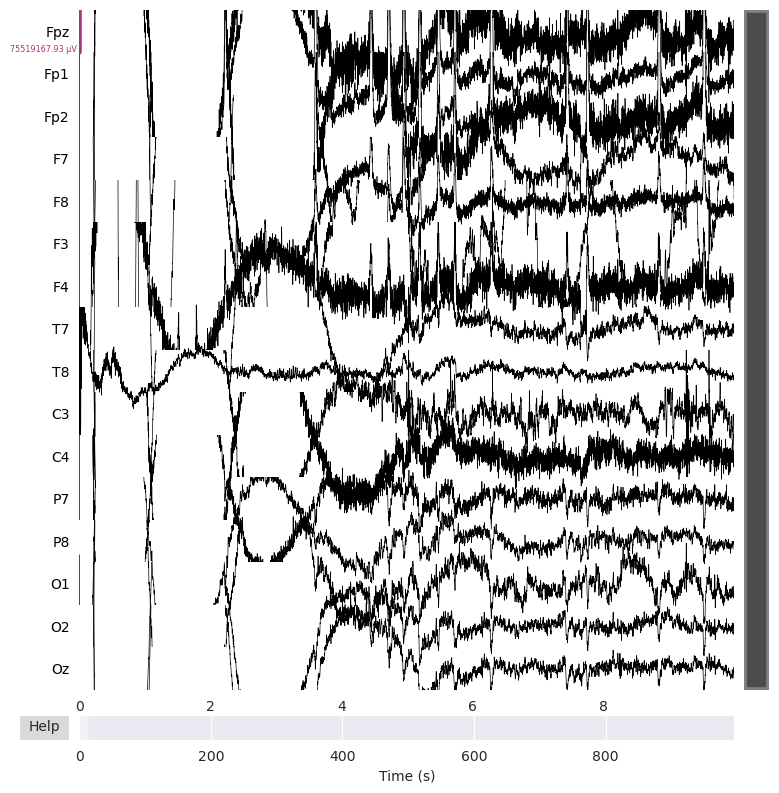

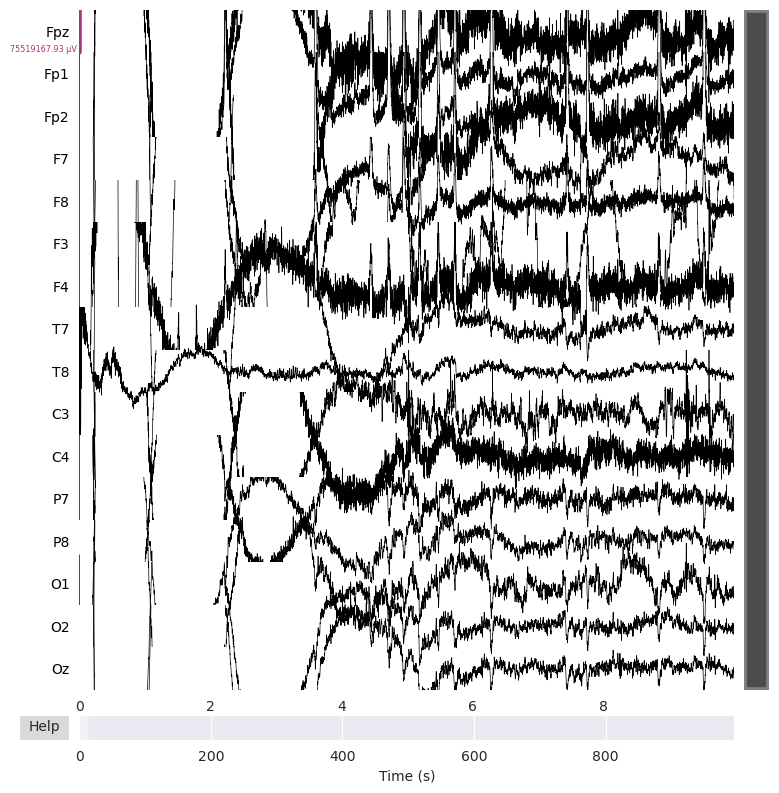

In [12]:
import mne

info = mne.create_info(ch_names, sfreq=fs, ch_types=ch_types)
raw = mne.io.RawArray(eeg, info)
print(raw)
raw.plot(title="EEG Signals", scalings='auto')

#### Filtered between desirable range (1-40 Hz)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3381 samples (3.302 s)



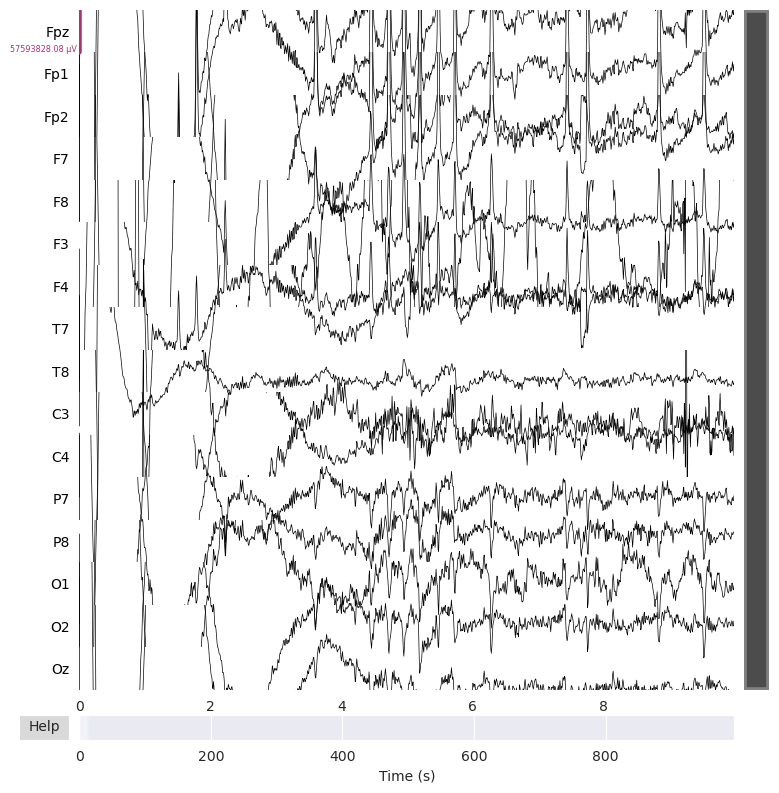

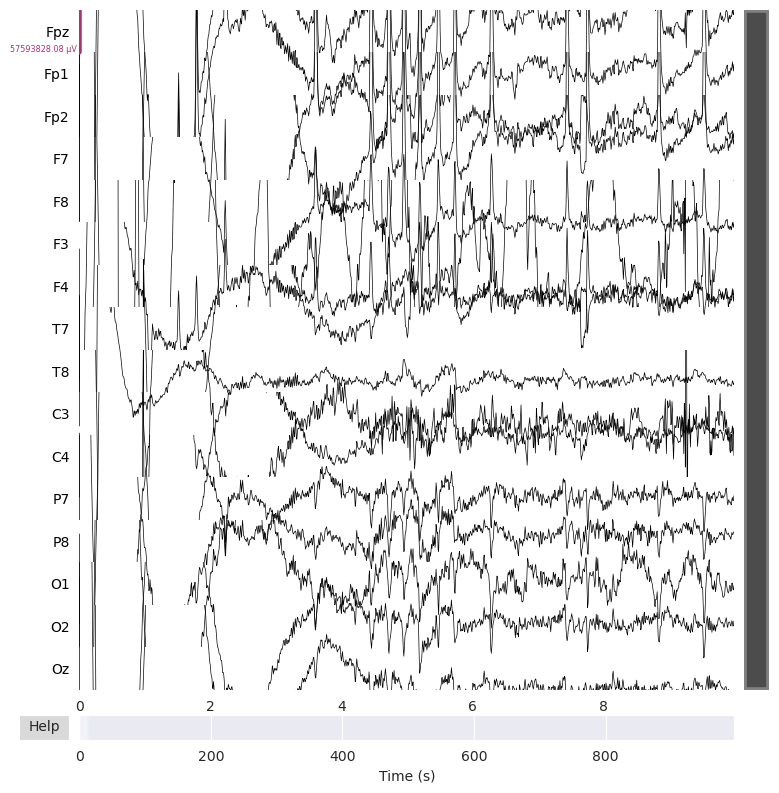

In [8]:
raw.filter(1., 40.)  # will keep 1-40 hz
raw.plot(title="Filtered EEG", scalings='auto')


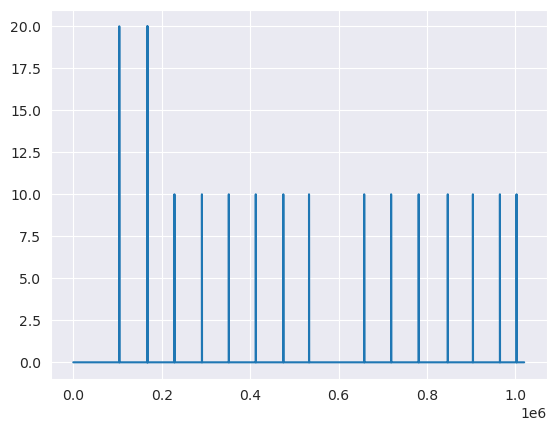

In [19]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(triggertime))], triggertime)
plt.show()
# print(triggertime)

In [15]:
len(triggertime)/1024

995.728515625

In [24]:
trigger_indices = np.where(triggertime != 0)[0]
n = min(len(trigger_indices), len(triggervalues))
trigger_indices = trigger_indices[:n]
triggervalues = triggervalues[:n]

⚠️ Mismatch: 16 indices vs 13 labels.


13